## 1. How are coefficients affected?

In [89]:
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [90]:
data = load_diabetes()

df = pd.DataFrame(data.data,columns=data.feature_names)
df['TARGET'] = data.target

df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  TARGET  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0

In [91]:
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=2)

In [92]:
coefs = []
r2_scores = []

for i in [0,0.1,1,10]:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))

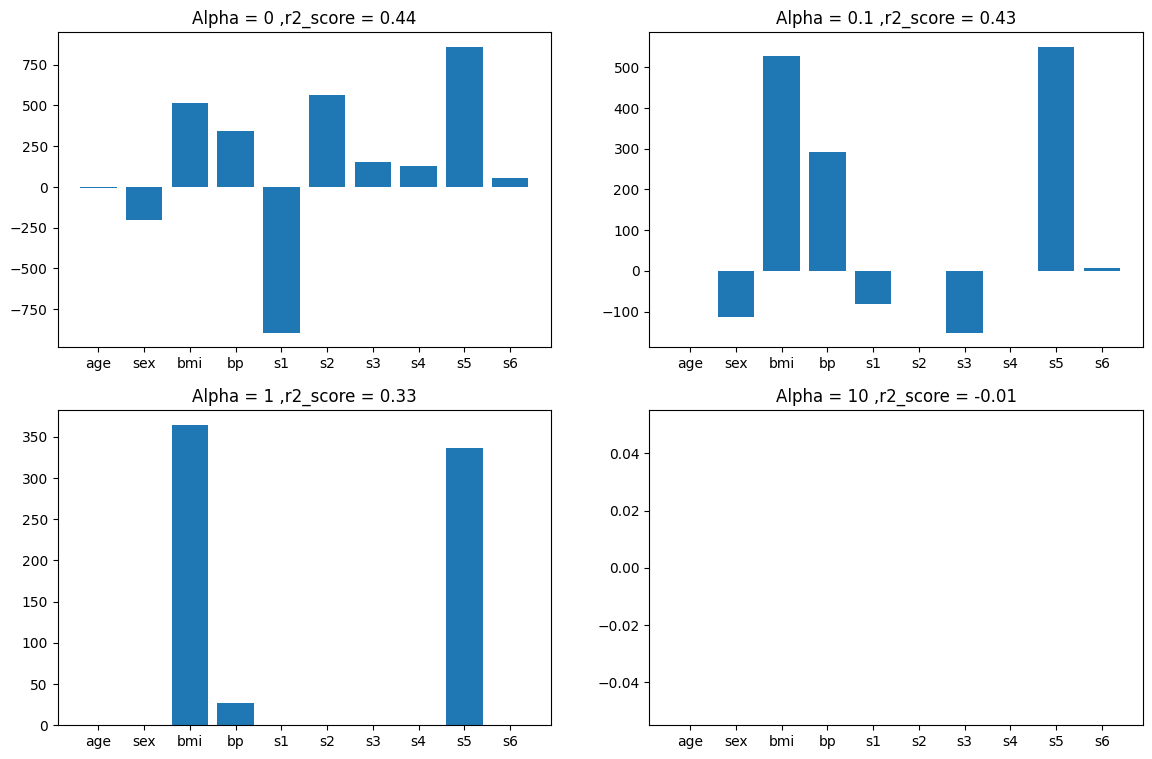

In [93]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 0.1 ,r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 1 ,r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()

## 2. Higher Coefficients are affected more

In [94]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

In [95]:
input_array = np.array(coefs)

coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

age         sex         bmi          bp          s1  \
alpha                                                                  
0.0000     -9.158653 -205.454322  516.693745  340.619999 -895.551989   
0.0001     -9.069064 -205.329406  516.789418  340.532379 -888.660904   
0.0010     -8.262770 -204.205364  517.650073  339.743901 -826.663603   
0.0100     -1.359721 -192.937180  526.356514  332.641101 -430.226975   
0.1000      0.000000 -113.969928  526.744396  292.628472  -82.693681   
1.0000      0.000000    0.000000  363.885742   27.273163    0.000000   
10.0000     0.000000    0.000000    0.000000    0.000000    0.000000   
100.0000    0.000000    0.000000    0.000000    0.000000    0.000000   
1000.0000   0.000000    0.000000    0.000000    0.000000    0.000000   
10000.0000  0.000000    0.000000    0.000000    0.000000    0.000000   

                    s2          s3          s4          s5         s6  
alpha                                                                  
0.0000      561.220669  153.893104  126.731395  861.126997  52.421122  
0.0001      555.958584  150.593655  125.450143  858.645541  52.380294  
0.0010      508.617395  120.908607  113.921773  836.320753  52.012849  
0.0100      191.295480  -44.034913   68.988987  688.396028  47.940616  
0.1000       -0.000000 -152.685338    0.000000  551.080291   7.170992  
1.0000        0.000000   -0.000000    0.000000  336.137262   0.000000  
10.0000       0.000000   -0.000000    0.000000    0.000000   0.000000  
100.0000      0.000000   -0.000000    0.000000    0.000000   0.000000  
1000.0000     0.000000   -0.000000    0.000000    0.000000   0.000000  
10000.0000    0.000000   -0.000000    0.000000    0.000000   0.000000

In [96]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

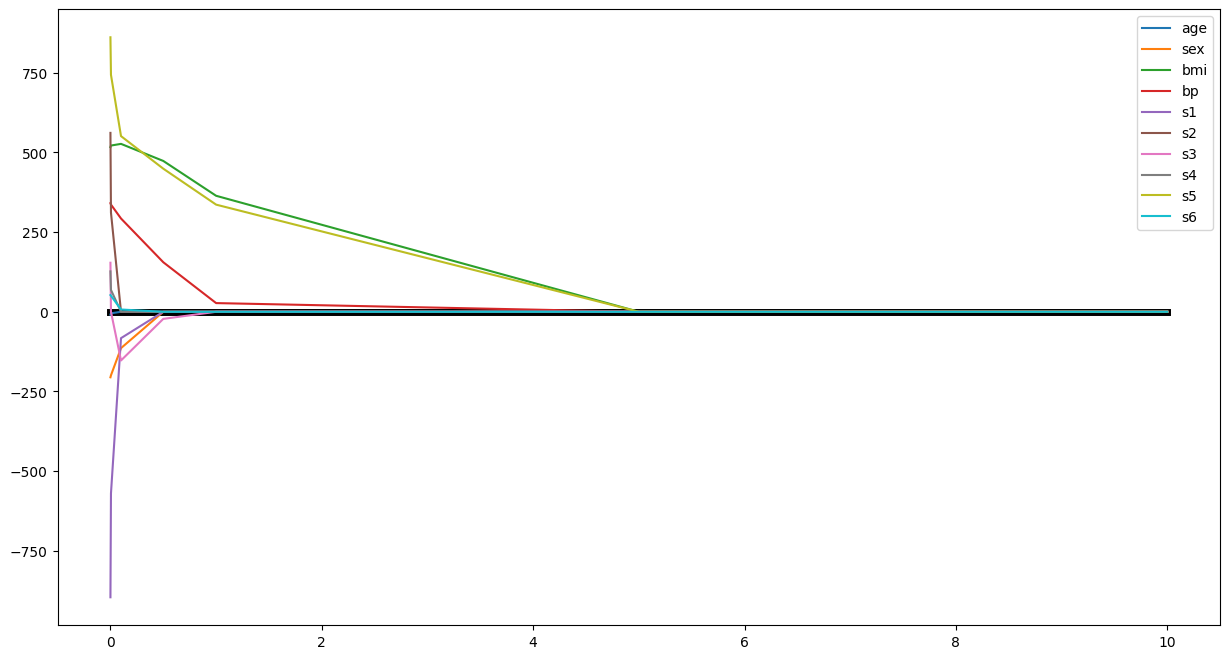

In [97]:
input_array = np.array(coefs).T

plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()

## 3. Impact on Bias and Variance

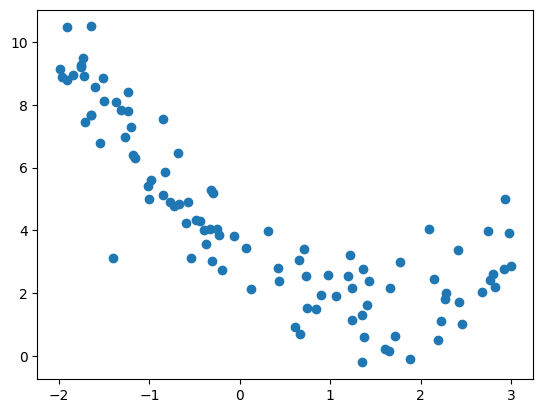

In [98]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [99]:
X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)

In [100]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [101]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Lasso(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79.06516930938156, tolerance: 0.05011338941067788
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53.0496634083365, tolerance: 0.029962426639303177
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84.93270469596173, tolerance: 0.04434272257399935
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94.5125009208336, tolerance: 0.0498392510314815
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80.71771001527497, tolerance: 0.04853026962387099
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82.83660084689458, tolerance: 0.04920125082678727
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82.94899675356979, tolerance: 0.04446459241474424
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81.94476499791907, tolerance: 0.04373230444856178
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111.00498285534374, tolerance: 0.05917359153495127
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52.86750954149201, tolerance: 0.0428803804531932
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104.57988050788316, tolerance: 0.05339271187306655
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97.276748646333, tolerance: 0.058406294316805704
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71.06606536532419, tolerance: 0.03948048731775189
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127.8718249244506, tolerance: 0.057010418148890324
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104.46882273474768, tolerance: 0.03730290146622043
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55.59705283293884, tolerance: 0.03420753407657251
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121.13840070823176, tolerance: 0.05509284904324003
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72.84929780206684, tolerance: 0.04901026745994457
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49.260414747444386, tolerance: 0.044813300528390235
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.93067003066517, tolerance: 0.05529727806298088
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50.53712775430948, tolerance: 0.05070151927403559
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87.04281499719143, tolerance: 0.05094499076579045
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61.676274748054055, tolerance: 0.042747536313496134
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79.67718731354097, tolerance: 0.05650600308831005
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84.17851951381192, tolerance: 0.04726679318763386
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79.17308125708065, tolerance: 0.03722289022404689
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71.72063079347542, tolerance: 0.05673523962929802
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69.2063515829452, tolerance: 0.05223802700329393
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.780636303684275, tolerance: 0.04446459241474424
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68.56711752755838, tolerance: 0.04373230444856178
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6451822703389496, tolerance: 0.04494610587845563
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70.00060480869668, tolerance: 0.04843234303464189
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79.7336186335527, tolerance: 0.04363462492073771
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2844879659726587, tolerance: 0.04381656144545302
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75.79192079548444, tolerance: 0.04835194706950463
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73.79110975444354, tolerance: 0.05016662910527371
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.70103657572443, tolerance: 0.045230180338376946
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57.128693154377615, tolerance: 0.03848999037272757
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73.49638873515175, tolerance: 0.05492324372915632
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82.21160764823466, tolerance: 0.045421949795859416
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57.13201340235524, tolerance: 0.046837441463492044
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.240798748022854, tolerance: 0.0249497379012093
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.417617362512601, tolerance: 0.05996414987297293
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.95398128573649, tolerance: 0.03502465937743031
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.678013449318911, tolerance: 0.04609855952408982
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84.63904727121425, tolerance: 0.05314411364599341
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.7305227753779775, tolerance: 0.04383798013294484
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.141771961155428, tolerance: 0.0480436606829881
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.123520741112657, tolerance: 0.05511210346480838
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6122797379584597, tolerance: 0.03184552465948883
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4957457498820759, tolerance: 0.04949077653975957
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.942838479021134, tolerance: 0.054960176458306614
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.5162011787078598, tolerance: 0.047318929400976276
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76.66548107845301, tolerance: 0.05682807567978574
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63.87509007414701, tolerance: 0.04752603314089127
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.491191113839477, tolerance: 0.041661697397575664
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.51212187284989, tolerance: 0.04142388793421577
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.863614826620676, tolerance: 0.05181121005422895
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.838551271508948, tolerance: 0.05094499076579045
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.407679637280154, tolerance: 0.042747536313496134
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63.28658611583768, tolerance: 0.0485070993099066
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.059028400517434, tolerance: 0.03948048731775189
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.506251236478647, tolerance: 0.057010418148890324
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7029441493603201, tolerance: 0.04794133095297326
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.996619337460743, tolerance: 0.04572837786222473
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3712559353635925, tolerance: 0.052481824357174245
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.605389594315426, tolerance: 0.03772607299464998
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5668685016384529, tolerance: 0.0708175473376161
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7695835634424384, tolerance: 0.051171150824276944
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.78656268942899, tolerance: 0.038127632528433264
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.144429995533073, tolerance: 0.04571901074424561
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.669653541679736, tolerance: 0.03789058697581226
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.606944873289223, tolerance: 0.04381656144545302
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9256214667707354, tolerance: 0.04835194706950463
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3726009645832846, tolerance: 0.05016662910527371
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.50207565633511, tolerance: 0.04301833689851093
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.25718317304151, tolerance: 0.04249976762027309
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5113538726545812, tolerance: 0.053309205072978046
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.37058517650047, tolerance: 0.04975168289590932
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37.540606225762176, tolerance: 0.04449864955076722
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.45762076954546, tolerance: 0.053470903418557036
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.802399295182795, tolerance: 0.04609855952408982
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.59510837362541, tolerance: 0.03266897801296487
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.53622001219415, tolerance: 0.036987713156191954
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.008122598334012, tolerance: 0.04502468842327919
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3899498878610075, tolerance: 0.06570386575680941
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.82880706838185, tolerance: 0.03926558094932511
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5578070546944787, tolerance: 0.05517903575499296
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.43670930172463, tolerance: 0.0485070993099066
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.414301564996833, tolerance: 0.03948048731775189
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.121802927375924, tolerance: 0.02771199748822096
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.39894612001325, tolerance: 0.04622014952770892
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.921160824082364, tolerance: 0.04783777320393546
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.78900181159105, tolerance: 0.041535447068826205
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.66216135250471, tolerance: 0.041610645653904876
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6237120889067, tolerance: 0.05388122953734072
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04683056052840584, tolerance: 0.04047628667863113
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.800424128103373, tolerance: 0.04500442253435233
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39.945810084663066, tolerance: 0.04494610587845563
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converg

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.672530733754542, tolerance: 0.03534336977811127
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.356322628935544, tolerance: 0.04739241149885578
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.145440245732715, tolerance: 0.036075669895922986
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.58896613878352, tolerance: 0.04961844773732665
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.079644588426035, tolerance: 0.04084274205128935
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0037239816808778, tolerance: 0.05511210346480838
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.309967672777205, tolerance: 0.03420753407657251
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.288965880659617, tolerance: 0.05509284904324003
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.90205475927755, tolerance: 0.04901026745994457
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.16273719122887, tolerance: 0.0708175473376161
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.78094952025333, tolerance: 0.051171150824276944
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39.37485524152737, tolerance: 0.03097254270520366
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.351116453580488, tolerance: 0.04500442253435233
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6751851013921737, tolerance: 0.04494610587845563
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.2530867448441825, tolerance: 0.04843234303464189
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.896253411855895, tolerance: 0.04383798013294484
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3680838529151629, tolerance: 0.0480436606829881
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.63258115374333, tolerance: 0.0561969759217962
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.255237197760806, tolerance: 0.03601986797285881
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.4684280713266, tolerance: 0.0551253175592655
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.209773758707342, tolerance: 0.04622775151823223
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.18832250655049, tolerance: 0.04794133095297326
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.55188415398979, tolerance: 0.04572837786222473
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.76387151220467, tolerance: 0.052481824357174245
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.81739327145418, tolerance: 0.04446459241474424
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37.631199208822096, tolerance: 0.04373230444856178
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.967325758401444, tolerance: 0.05917359153495127
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57.705971895694645, tolerance: 0.041661697397575664
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.76984165229251, tolerance: 0.04142388793421577
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.67526692951313, tolerance: 0.05149072939194489
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37.52411399716942, tolerance: 0.04951444076852722
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.80478937089316, tolerance: 0.04982745937334679
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69.48589381564733, tolerance: 0.05011338941067788
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.92131331532826, tolerance: 0.052725042446096215
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45.24391953981839, tolerance: 0.03686072327162291
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.60077874448507, tolerance: 0.0557174148488382
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55.661429822700796, tolerance: 0.053309205072978046
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.25454957868155, tolerance: 0.04610503433432359
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37.14191122625962, tolerance: 0.049475615220856174
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.48568691630899, tolerance: 0.047318929400976276
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.5350920321068, tolerance: 0.05682807567978574
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50.49331820956286, tolerance: 0.0626317834968706
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.370051292546236, tolerance: 0.05720388388555754
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.019452861748306, tolerance: 0.04050551905442658
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.95071139461723, tolerance: 0.050507123841182174
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45.66784794890248, tolerance: 0.058406294316805704
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53.786835472280416, tolerance: 0.05358367230561042
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.080750215804045, tolerance: 0.042177804902292705
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.497806424345299, tolerance: 0.03534336977811127
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47.26025977557791, tolerance: 0.04739241149885578
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.052684809539016, tolerance: 0.036075669895922986
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.761541322861035, tolerance: 0.05673523962929802
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51.608347181087154, tolerance: 0.03601986797285881
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51.917762176010825, tolerance: 0.0551253175592655
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.08620346357111, tolerance: 0.04622014952770892
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63.31410686160396, tolerance: 0.04783777320393546
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50.10117948067453, tolerance: 0.04794133095297326
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51.993491642997554, tolerance: 0.041535447068826205
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.19907724777201, tolerance: 0.041610645653904876
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51.5131292869348, tolerance: 0.05388122953734072
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47.3615430259903, tolerance: 0.05996414987297293
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.341479880368, tolerance: 0.03502465937743031
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58.74270912478117, tolerance: 0.04609855952408982
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76.21938187742288, tolerance: 0.05011338941067788
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.69865924243598, tolerance: 0.029962426639303177
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45.266672657485174, tolerance: 0.04434272257399935
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63.870932160187095, tolerance: 0.04726679318763386
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.79067331853852, tolerance: 0.03722289022404689
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51.86037045064282, tolerance: 0.05673523962929802
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55.021820659704645, tolerance: 0.04168613139475897
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57.08911031520834, tolerance: 0.04167171437986697
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.651580510200574, tolerance: 0.054305291449966105
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.282246066635366, tolerance: 0.0249497379012093
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.867342638917336, tolerance: 0.04730277612873488
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67.14785710838302, tolerance: 0.054960176458306614
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50.802273564796764, tolerance: 0.050507123841182174
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.6371989250344, tolerance: 0.03772607299464998
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69.58047565494185, tolerance: 0.0708175473376161
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57.56357493052998, tolerance: 0.04363462492073771
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.74347403749903, tolerance: 0.05743379260542795
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.714689237158638, tolerance: 0.026597995112050552
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39.59756092936931, tolerance: 0.03926558094932511
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.891774819036016, tolerance: 0.05181121005422895
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69.21879337759924, tolerance: 0.05094499076579045
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57.193641425821525, tolerance: 0.03948048731775189
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79.2009852681644, tolerance: 0.057010418148890324
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.500967462912115, tolerance: 0.03730290146622043
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.96145601730697, tolerance: 0.04736069538824559
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72.10673357153314, tolerance: 0.053309205072978046
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53.32815248537267, tolerance: 0.04610503433432359
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60.72645653645577, tolerance: 0.05682807567978574
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.23958157753293, tolerance: 0.0626317834968706
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.56814678495266, tolerance: 0.03449978784813421
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72.61487504091116, tolerance: 0.0708175473376161
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62.283500503834944, tolerance: 0.051171150824276944
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.51212222546529, tolerance: 0.03097254270520366
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53.154738649384825, tolerance: 0.05743379260542795
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.36842423512297273, tolerance: 0.03571649666490299
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.61396207591011, tolerance: 0.026597995112050552
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72.66426438438107, tolerance: 0.05094499076579045
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.128729574857431, tolerance: 0.042747536313496134
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67.4280120306724, tolerance: 0.05650600308831005
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61.3950153434312, tolerance: 0.04058676587288989
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61.635578580140404, tolerance: 0.045517078075883406
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55.45863377982229, tolerance: 0.043629209562748496
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67.73744812673593, tolerance: 0.05505105959996943
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.30100104452055, tolerance: 0.04331778433384541
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70.28939655522963, tolerance: 0.04961844773732665
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.498881765015994, tolerance: 0.04901026745994457
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69.88033321883526, tolerance: 0.05124629395754687
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62.06771955539925, tolerance: 0.0472844944994882
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59.03299656026978, tolerance: 0.03951781859062236
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61.982082452878814, tolerance: 0.048172820404972574
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57.966231804904396, tolerance: 0.041535447068826205
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converg

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.075669782601835, tolerance: 0.04609855952408982
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.978993610326086, tolerance: 0.03266897801296487
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.0749024928256, tolerance: 0.036987713156191954
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37.05100036357001, tolerance: 0.05093121183594526
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.398992106381485, tolerance: 0.04951444076852722
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.77596847529739, tolerance: 0.04982745937334679
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.489902184276474, tolerance: 0.040768320311091746
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.26233610037923, tolerance: 0.049593730038536975
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70.04927267894885, tolerance: 0.04550976724205836
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.723125713884997, tolerance: 0.04331778433384541
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73.29265146339563, tolerance: 0.04961844773732665
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06950233800648675, tolerance: 0.04084274205128935
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.231214711794763, tolerance: 0.04901026745994457
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71.39548133066353, tolerance: 0.05124629395754687
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62.8013636689754, tolerance: 0.0472844944994882
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57.90481270449098, tolerance: 0.05794776886652758
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.13722773556785, tolerance: 0.03951781859062236
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63.642864134585224, tolerance: 0.048172820404972574
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64.03983894891829, tolerance: 0.04363462492073771
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61.037200322534346, tolerance: 0.05743379260542795
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.512639187941659, tolerance: 0.03571649666490299
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49.26293608014916, tolerance: 0.04383798013294484
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.293016622421419, tolerance: 0.0561969759217962
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4989659876432597, tolerance: 0.04502468842327919
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68.21590897618707, tolerance: 0.06882453806342814
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78.09785740992709, tolerance: 0.052725042446096215
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8409847479779557, tolerance: 0.03686072327162291
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.339092291876, tolerance: 0.04610503433432359
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72.82492141029198, tolerance: 0.049475615220856174
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.597756521943154, tolerance: 0.04840073247238547
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71.92810585872436, tolerance: 0.05682807567978574
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5916046948232747, tolerance: 0.0626317834968706
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.254392421901201, tolerance: 0.03449978784813421
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.99607506226957, tolerance: 0.03772607299464998
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75.60836963033368, tolerance: 0.0708175473376161
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66.26379847197342, tolerance: 0.051171150824276944
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67.71726230221316, tolerance: 0.052418948354003445
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73.45307616355268, tolerance: 0.06141774592497812
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.449673872867294, tolerance: 0.038107461567951854
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.361531907083986, tolerance: 0.03772526990616965
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.3572090178273015, tolerance: 0.05093121183594526
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.987909036479607, tolerance: 0.04951444076852722
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.818173639441369, tolerance: 0.04819912712333085
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.781624251509726, tolerance: 0.04777457099630529
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.32323777556678, tolerance: 0.04835194706950463
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83.38055166485334, tolerance: 0.053167515431612335
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.41518894958676356, tolerance: 0.0498392510314815
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.84377605744129, tolerance: 0.04920125082678727
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.5013499306316476, tolerance: 0.05862505022214026
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.253873394312677, tolerance: 0.04168613139475897
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61.79024954306155, tolerance: 0.04167171437986697
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.413674837202365, tolerance: 0.05981094602927126
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5300347660456737, tolerance: 0.051351836397942933
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39.69437914302483, tolerance: 0.045421949795859416
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converg

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66.93310358530096, tolerance: 0.04933884333212308
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5690963995223512, tolerance: 0.04299123195049092
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.21082179978344584, tolerance: 0.058967488164632244
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converg

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64.03169356031385, tolerance: 0.04843234303464189
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56.47463128098255, tolerance: 0.04363462492073771
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.74108644182459, tolerance: 0.05743379260542795
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4502956768105264, tolerance: 0.042747536313496134
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75.0971649610582, tolerance: 0.05650600308831005
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.757397008921885, tolerance: 0.03772526990616965
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.37579282808659, tolerance: 0.04835194706950463
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.901338618371852, tolerance: 0.05016662910527371
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.545395335890419, tolerance: 0.042644036198967665
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.95338921675028, tolerance: 0.04442598676603375
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.23728463231916, tolerance: 0.04726679318763386
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.225753740281391, tolerance: 0.03722289022404689
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61.30914320773647, tolerance: 0.04167171437986697
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.250927587982119, tolerance: 0.054305291449966105
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.88713793578313, tolerance: 0.03481528643813497
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.3680542391159065, tolerance: 0.054960176458306614
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68.66872770063046, tolerance: 0.05682807567978574
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2231215820680177, tolerance: 0.0626317834968706
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.926085163747132, tolerance: 0.03951781859062236
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57.84305359899433, tolerance: 0.048172820404972574
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.181591175902554, tolerance: 0.041535447068826205
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converg

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.25968287647143, tolerance: 0.04752603314089127
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7578034092780968, tolerance: 0.041661697397575664
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.56349043064219, tolerance: 0.04142388793421577
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.042670882727407, tolerance: 0.052645565196768156
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.920874008313547, tolerance: 0.038127632528433264
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.199239219070392, tolerance: 0.04571901074424561
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82.87696112331369, tolerance: 0.05314411364599341
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.431125999667216, tolerance: 0.04383798013294484
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1378927594730044, tolerance: 0.04502468842327919
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.017303431205875, tolerance: 0.043629209562748496
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4333849566578465, tolerance: 0.040768320311091746
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8220309849285741, tolerance: 0.049593730038536975
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conve

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17810162331346646, tolerance: 0.0498392510314815
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.933406217954882, tolerance: 0.04920125082678727
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.667919249144234, tolerance: 0.04442598676603375
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9718426373547118, tolerance: 0.05862505022214026
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.335247729114144, tolerance: 0.04168613139475897
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.36893629929014, tolerance: 0.04167171437986697
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39.29376596884492, tolerance: 0.05682807567978574
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1528572336127354, tolerance: 0.0626317834968706
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.954245045026596, tolerance: 0.03449978784813421
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.772590082619786, tolerance: 0.04545803370377258
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5837064666092715, tolerance: 0.05794776886652758
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.361521786297658, tolerance: 0.03951781859062236
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11035048595488206, tolerance: 0.059715435432094434
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.25818928939691, tolerance: 0.04752603314089127
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.234200480768834, tolerance: 0.041661697397575664
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converg

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.079907221341614, tolerance: 0.06022396466407916
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.803151296617386, tolerance: 0.04668267440917306
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3715889258256766, tolerance: 0.04712233070986041
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60.13644631234419, tolerance: 0.05635245174506859
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5296602642334278, tolerance: 0.046167833300753684
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.41872048217729, tolerance: 0.05285429642953612
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0993002461335095, tolerance: 0.06882453806342814
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.69516170175814, tolerance: 0.052725042446096215
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7682871131732725, tolerance: 0.03686072327162291
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3377725887584404, tolerance: 0.04331778433384541
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81.13360160042187, tolerance: 0.04961844773732665
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11798214772886695, tolerance: 0.03184552465948883
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.403602540218003, tolerance: 0.04622014952770892
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.736794039427906, tolerance: 0.04783777320393546
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.0325681510723825, tolerance: 0.04794133095297326
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.06458832397817, tolerance: 0.046837441463492044
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.827305491505598, tolerance: 0.0249497379012093
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49.910874298785984, tolerance: 0.04730277612873488
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.636773654045385, tolerance: 0.03097254270520366
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.990540101978013, tolerance: 0.04534744894909608
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.675798082815675, tolerance: 0.04545803370377258
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.4000461037122705, tolerance: 0.04609855952408982
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.7433119115972318, tolerance: 0.03266897801296487
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.599363763859884, tolerance: 0.036987713156191954
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.810335739426534, tolerance: 0.04668267440917306
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.278508275773504, tolerance: 0.04712233070986041
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.34307532233475513, tolerance: 0.03813886778325001
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.16262954925377926, tolerance: 0.049061225285287766
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57.46748324200604, tolerance: 0.05314411364599341
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.819400084680552, tolerance: 0.04383798013294484
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.707506694595992, tolerance: 0.06882453806342814
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.950160624878492, tolerance: 0.052725042446096215
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.580661944740342, tolerance: 0.03686072327162291
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.22300181207902, tolerance: 0.04622014952770892
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.787812437174694, tolerance: 0.04783777320393546
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8519271502908623, tolerance: 0.04794133095297326
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.409077387992113, tolerance: 0.04449864955076722
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79.14668028530528, tolerance: 0.053470903418557036
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.078939477010465, tolerance: 0.05981094602927126
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.909034993299258, tolerance: 0.04700977316511625
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.434294240316575, tolerance: 0.0322598118252757
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.914814667964436, tolerance: 0.05720388388555754
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

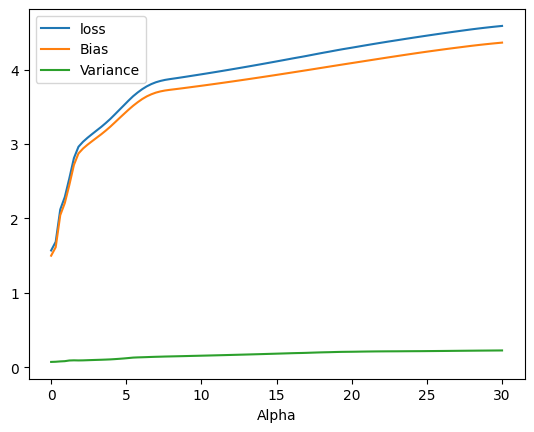

In [102]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='Variance')
plt.xlabel('Alpha')
plt.legend()

## 4. Effect of Regularization on Loss Function

[27.82809103]
-2.29474455867698


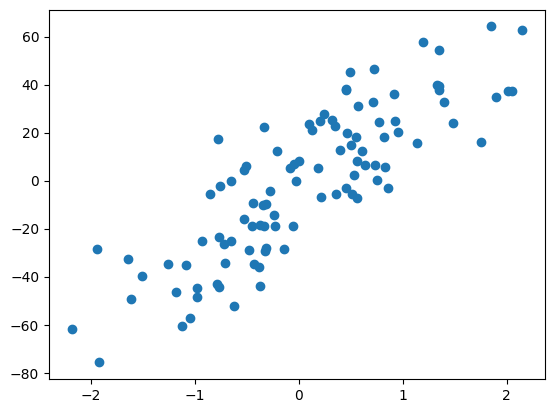

In [85]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [86]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*abs(m)

In [87]:
def predict(m):
    return m*X - 2.29

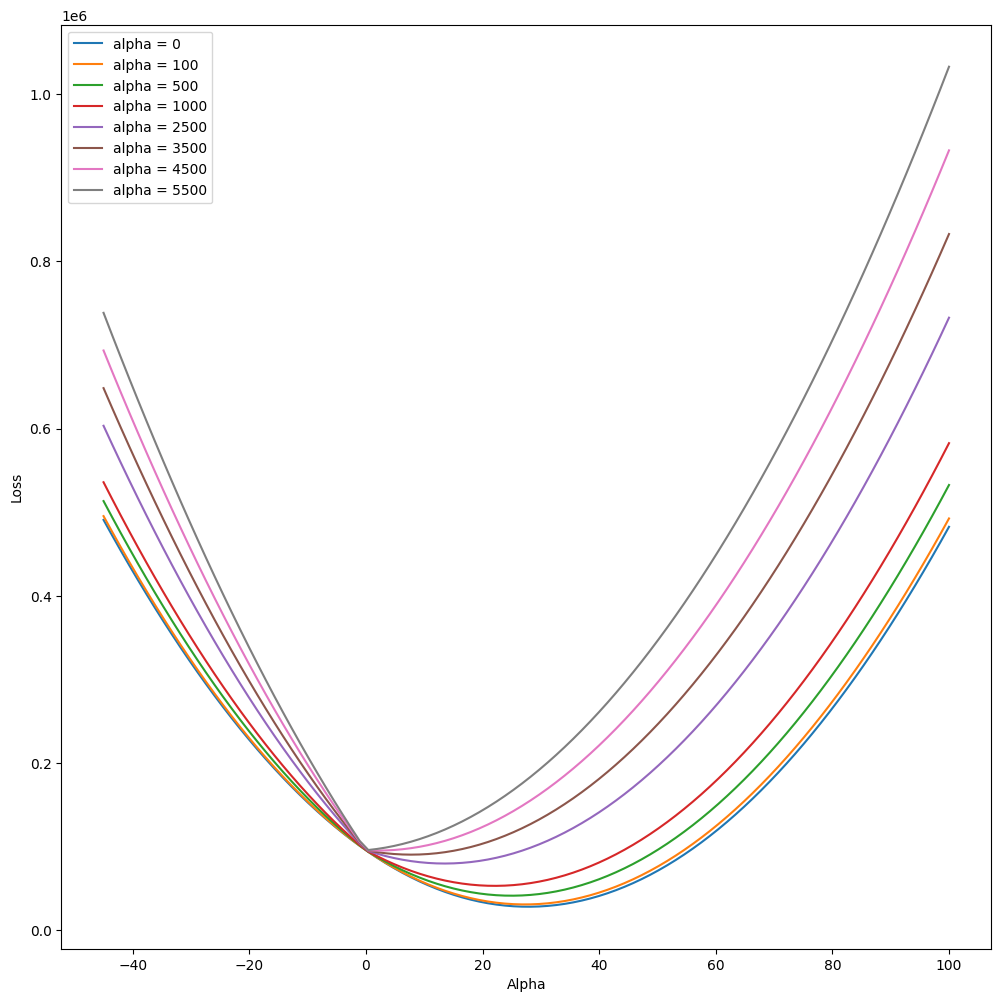

In [88]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(12,12))
for j in [0,100,500,1000,2500,3500,4500,5500]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.show()